In [235]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns

In [237]:
data = pd.read_csv("Iris.csv")
data.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
25,5.0,3.0,1.6,0.2,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor
112,6.8,3.0,5.5,2.1,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [238]:
data.fillna(data.median(), inplace=True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [239]:
data['Class'] = data['Class'].replace({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [240]:
cor_matrix = data.corr() # drop columns having correlation < 0.1 with target variable
target = abs(cor_matrix['Class'])
not_relevant_features = target[target<0.1]
not_relevant_features

Series([], Name: Class, dtype: float64)

In [241]:
data.drop(columns=relevant_features.index,axis=1, inplace=True)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [242]:
var_matrix = data.var()
drop_columns = var_matrix[var_matrix < 0.1]
drop_columns

Series([], dtype: float64)

In [243]:
data.drop(columns=drop_columns.index, axis=1, inplace=True)

## Question 6

*Plot the scatter matrix for all the variables.*

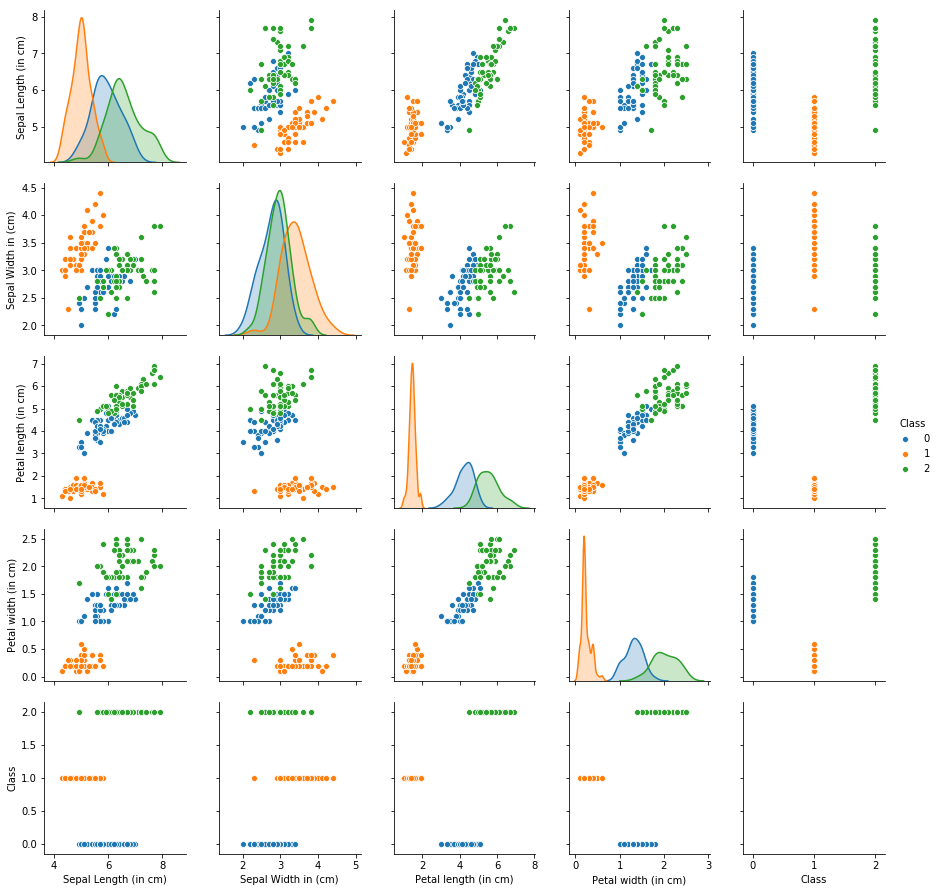

In [244]:
sns.pairplot(data, hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [245]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

In [246]:
X = data.iloc[:,0:4]
Y = data.iloc[:,4]

In [247]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [248]:
from sklearn.neighbors import KNeighborsClassifier  

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [249]:
def knn(k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    return metrics.accuracy_score(Y_test, y_pred)

In [250]:
print("For K = %d, accuracy = %f"%(3, knn(3)))
print("For K = %d, accuracy = %f"%(3, knn(5)))
print("For K = %d, accuracy = %f"%(3, knn(9)))

For K = 3, accuracy = 1.000000
For K = 3, accuracy = 1.000000
For K = 3, accuracy = 0.966667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [251]:
k_values = np.arange(1,21,2)
mses = []
for k in k_values:
    accuracy = knn(k)
    mse = 1 - accuracy
    mses.append(mse)
    print("For K = %d, mse = %f"%(k, mse))

For K = 1, mse = 0.000000
For K = 3, mse = 0.000000
For K = 5, mse = 0.000000
For K = 7, mse = 0.033333
For K = 9, mse = 0.033333
For K = 11, mse = 0.033333
For K = 13, mse = 0.033333
For K = 15, mse = 0.033333
For K = 17, mse = 0.033333
For K = 19, mse = 0.033333


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Mean Error')

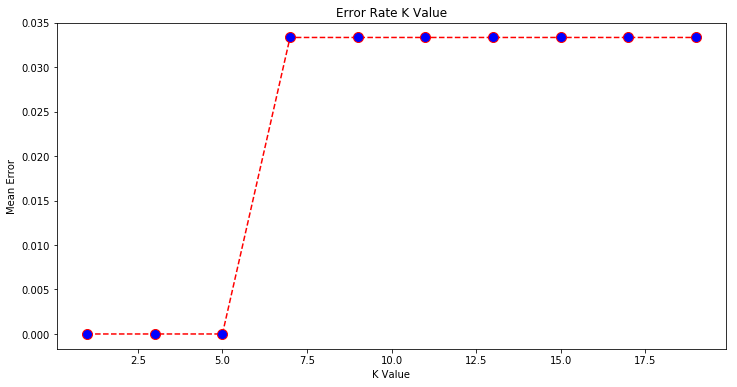

In [253]:
plt.figure(figsize=(12, 6))  
plt.plot(k_values, mses, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# Naive Bayes with Iris Data

In [254]:
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [255]:
x = data.iloc[:,0:4]
y = data.iloc[:,4]

In [256]:
#Check the dataset
print(y)
print(X)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6      

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

Text(0.5, 0, 'class')

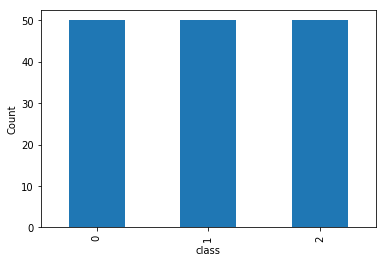

In [257]:
# checking class balance
plt.figure()
pd.Series(y).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")

In [258]:
data.groupby('Class').count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [259]:
#Drop Id variable from data
#data.drop('Id', inplace=True)

### Question 12 
Find Correlation among all variables and give your insights 

In [260]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [261]:
data.corr().abs()
# Sepal Length, Petal Length and Petal Width are highly correlated to each other

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,0.109369,0.871754,0.817954,0.322522
Sepal Width in (cm),0.109369,1.000000,0.420516,0.356544,0.192719
Petal length (in cm),0.871754,0.420516,1.000000,0.962757,0.299942
Petal width (in cm),0.817954,0.356544,0.962757,1.000000,0.375715
Class,0.322522,0.192719,0.299942,0.375715,1.000000


### Split data in Training and test set in 80:20.

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Question 13 
Do Feature Scaling 

In [263]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler  

In [264]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [265]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [266]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)

In [267]:
y_pred_GNB

array([1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 2])

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [268]:
# show Confusion Matrix
confusion_matrix(Y_test, y_pred_GNB)

array([[ 7,  0,  1],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [269]:
# show accuracy
metrics.accuracy_score(Y_test, y_pred_GNB)

0.9666666666666667

In [270]:
#Show precision and Recall metrics

In [271]:
print(classification_report(Y_test, y_pred_GNB))  

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00        14
           2       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

